In [1]:
from preprocess import *

In [4]:
#write your code here
file_path = 'corpus/corpus.txt'
with open(file_path) as infile:
    file_content = infile.read()

# Import Library

In [8]:
import textstat
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macintoshssd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macintoshssd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read File

In [6]:
file_content

'Computer science is the study of computation, information, and automation.[1][2][3] Computer science spans theoretical disciplines (such as algorithms, theory of computation, and information theory) to applied disciplines (including the design and implementation of hardware and software).[4][5][6] Though more often considered an academic discipline, computer science is closely related to computer programming.[7]\n\nAlgorithms and data structures are central to computer science.[8] The theory of computation concerns abstract models of computation and general classes of problems that can be solved using them. The fields of cryptography and computer security involve studying the means for secure communication and for preventing security vulnerabilities. Computer graphics and computational geometry address the generation of images. Programming language theory considers different ways to describe computational processes, and database theory concerns the management of repositories of data. 

# Analyzing text statistics

In [7]:
# Get text statistics
word_count = textstat.lexicon_count(file_content)
sentence_count = textstat.sentence_count(file_content)
flesch_reading_ease = textstat.flesch_reading_ease(file_content)
flesch_kincaid_grade = textstat.flesch_kincaid_grade(file_content)

# Print out the statistics
print("Text Statistics:")
print(f"Word count: {word_count}")
print(f"Sentence count: {sentence_count}")
print(f"Flesch Reading Ease: {flesch_reading_ease}")
print(f"Flesch-Kincaid Grade: {flesch_kincaid_grade}")

Text Statistics:
Word count: 12203
Sentence count: 573
Flesch Reading Ease: 32.94
Flesch-Kincaid Grade: 14.0


In [66]:
def comparing_word_count_vs_sent_count(file_content): 
    word_count = textstat.lexicon_count(file_content)
    sentence_count = textstat.sentence_count(file_content)
    categories = ['Word Count', 'Sentence Count']
    counts = [word_count, sentence_count]
    # Create bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color=['#2D8BBA', '#31356E'])

    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title('Word Count vs. Sentence Count')

    # Show plot
    plt.show()

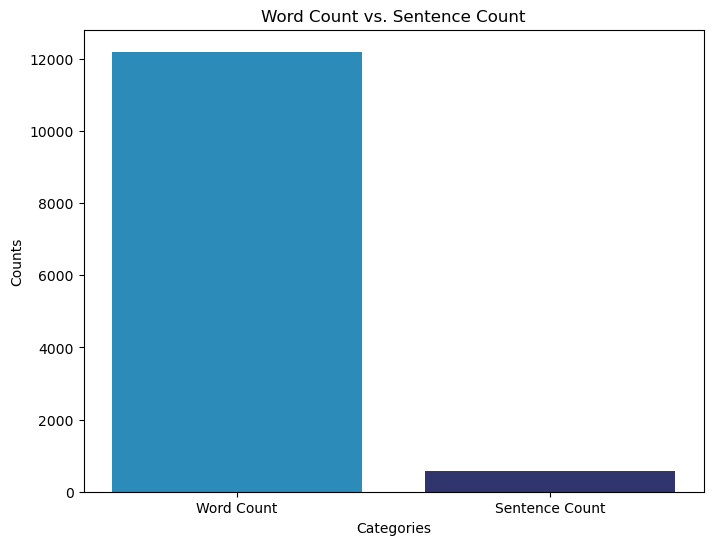

In [67]:
comparing_word_count_vs_sent_count(file_content)

In [68]:
def comparing_word_count_vs_sent_count_in_percentage(file_content): 
    word_count = textstat.lexicon_count(file_content)
    sentence_count = textstat.sentence_count(file_content)
    categories = ['Word Count', 'Sentence Count']
    counts = [word_count, sentence_count]
    # Create pie chart
    plt.figure(figsize=(8, 6))
    # Create pie chart
    plt.figure(figsize=(8, 6))
    _, _, autopcts = plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=['#2D8BBA', '#31356E'], startangle=140)

    # Change color of percentage text to white
    for autopct in autopcts:
        autopct.set_color('white')

    # Add title
    plt.title('Word Count vs. Sentence Count')

    # Show plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Figure size 800x600 with 0 Axes>

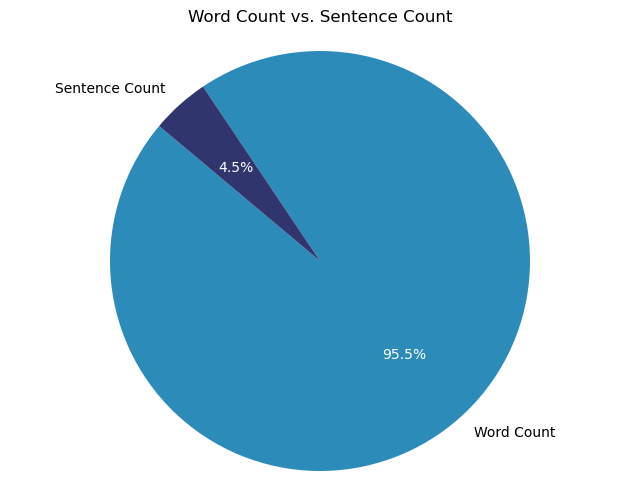

In [69]:
comparing_word_count_vs_sent_count_in_percentage(file_content)

In [17]:
# Download the punkt tokenizer if not already downloaded
nltk.download('punkt')

# Tokenize the text content into sentences
sentences = nltk.sent_tokenize(file_content)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macintoshssd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
def average_word_length_in_sentence(file_content):
    # Tokenize the text content into sentences
    sentences = nltk.sent_tokenize(file_content)
    # print(sentences)
    
    # Define ranges for average word length
    ranges = {
        (0, 1): '0 - 2',
        (2, 4): '2 - 4',
        (4, 6): '4 - 6',
        (6, 8): '6 - 8',
        (8, 10): '8 - 10',
        (10, float('inf')): '10+'
    }
    # Create a dictionary to store counts for each range
    average_word_length_counts = {range_label: 0 for range_label in ranges.values()}

    # Iterate through each sentence and calculate the average word length
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        word_count = len(words)
        total_word_length = sum(len(word) for word in words)
        average_word_length = total_word_length / word_count if word_count > 0 else 0

        # Determine the range for the average word length
        for range_bounds, range_label in ranges.items():
            if range_bounds[0] <= average_word_length < range_bounds[1]:
                average_word_length_counts[range_label] += 1
                break
    print(average_word_length_counts)
    # Print the counts for each range
    for range_label, count in average_word_length_counts.items():
        print(f"Range {range_label}: {count} sentences")
    
    return average_word_length_counts

In [76]:
def histogram_of_different_average_word_length(average_word_length_counts):
    # Extract range labels and counts
    range_labels = list(average_word_length_counts.keys())
    counts = list(average_word_length_counts.values())

    # Create histogram
    plt.figure(figsize=(8, 5))
    bars = plt.bar(range_labels, counts, color='skyblue', width=0.5)

    # Add counts on top of each bar
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                ha='center', va='bottom')

    plt.xlabel('Average Word Length Range')
    plt.ylabel('Number of Sentences')
    plt.title('Histogram of Average Word Length Ranges')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

{'0 - 2': 0, '2 - 4': 85, '4 - 6': 438, '6 - 8': 25, '8 - 10': 0, '10+': 0}
Range 0 - 2: 0 sentences
Range 2 - 4: 85 sentences
Range 4 - 6: 438 sentences
Range 6 - 8: 25 sentences
Range 8 - 10: 0 sentences
Range 10+: 0 sentences


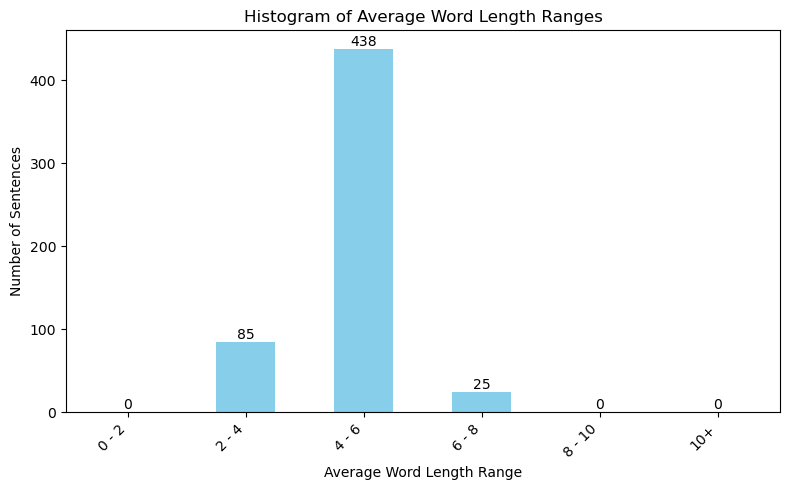

In [89]:
average_word_length_counts_func = average_word_length_in_sentence(file_content)
histogram_of_different_average_word_length(average_word_length_counts_func)

In [105]:
def analyze_stopwords(file_content):

    # Tokenize the text content into words
    words = nltk.word_tokenize(file_content)

    # Get the list of English stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Filter out stopwords from the words list
    filtered_words = [word.lower() for word in words if word.lower() in stop_words]

    # Count the occurrences of each stopword
    stopword_counts = Counter(filtered_words)

    # Print the amount and types of stopwords
    print("Stopwords Analysis:")
    print(f"Total number of stopwords: {len(filtered_words)}")
    return stopword_counts

In [99]:
def plot_top_stopwords(stopword_counts, top_n=10):
    # Get the top N words with the highest count
    top_words = stopword_counts.most_common(top_n)

    # Extract words and counts for plotting
    top_words, counts = zip(*top_words)

    # Create bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_words, counts, color='skyblue')

    # Add counts on top of each bar
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')

    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Stop Words with the Highest Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Stopwords Analysis:
Total number of stopwords: 4684


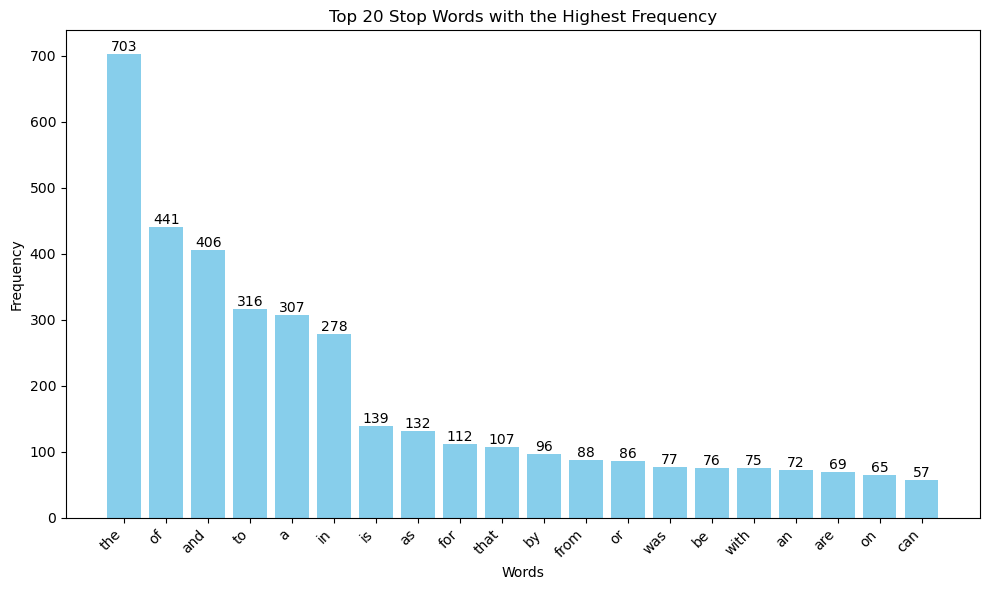

In [106]:
stopword_counts = analyze_stopwords(file_content)
plot_top_stopwords(stopword_counts, top_n=20)

In [107]:
def generate_and_display_wordcloud(file_content, width=800, height=400, background_color='white', title='Word Cloud of Text Data'):
    # Generate the word cloud
    wordcloud = WordCloud(width=width, height=height, background_color=background_color).generate(file_content)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)
    plt.show()

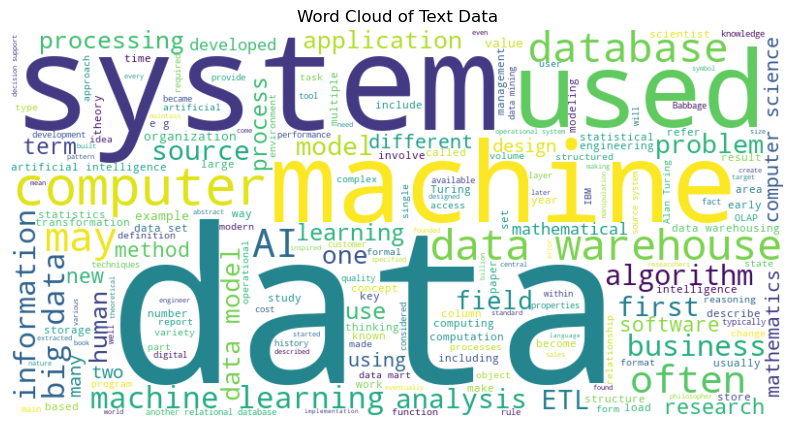

In [108]:
generate_and_display_wordcloud(file_content)

In [12]:
def get_unique_words_wordcloud(file_content):
    # Tokenize the content into words
    words = file_content.split()

    # Create a set to store unique words
    unique_words = set()

    # Iterate over the tokenized words and add them to the set
    for word in words:
        unique_words.add(word)
        
    # Convert the set of unique words to a string with words separated by spaces
    combine_text = ' '.join(unique_words)
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combine_text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    # return unique_words

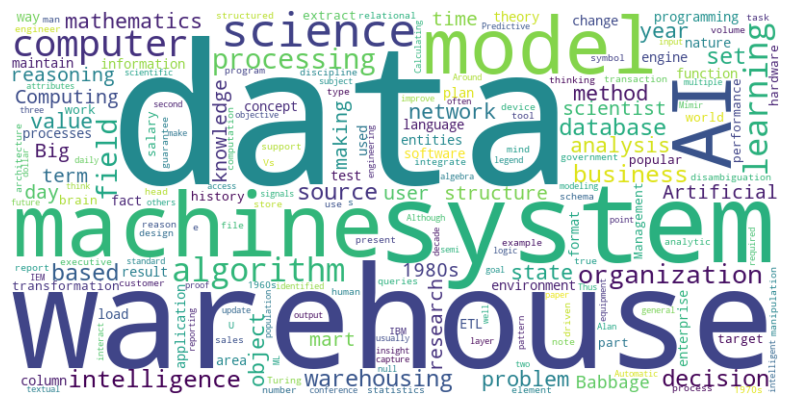

In [13]:
get_unique_words_wordcloud(file_content)

In [16]:
def analyze_frequency_used_word_with_no_stopword(text):
    # Define a regular expression pattern to match words
    pattern = r'\b[A-Za-z]+\b'

    # Find all words matching the pattern
    words = re.findall(pattern, text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Count the frequency of each word
    word_freq = Counter(filtered_words)

    # Optionally, you can sort the word frequencies
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

    return sorted_word_freq

In [19]:
# Analyze the frequency of words excluding stopwords
word_freq_no_stopword = analyze_frequency_used_word_with_no_stopword(file_content)

In [24]:
def plot_top_words(word_freq_no_stopword, top_n=10):
    # Extract the top N words and their frequencies
    top_words = [word[0] for word in word_freq_no_stopword[:top_n]]
    top_frequencies = [word[1] for word in word_freq_no_stopword[:top_n]]

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_words, top_frequencies, color='skyblue')
    
    # Add counts on top of each bar
    for bar, count in zip(bars, top_frequencies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')

    # Add labels and title
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Words Frequency')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

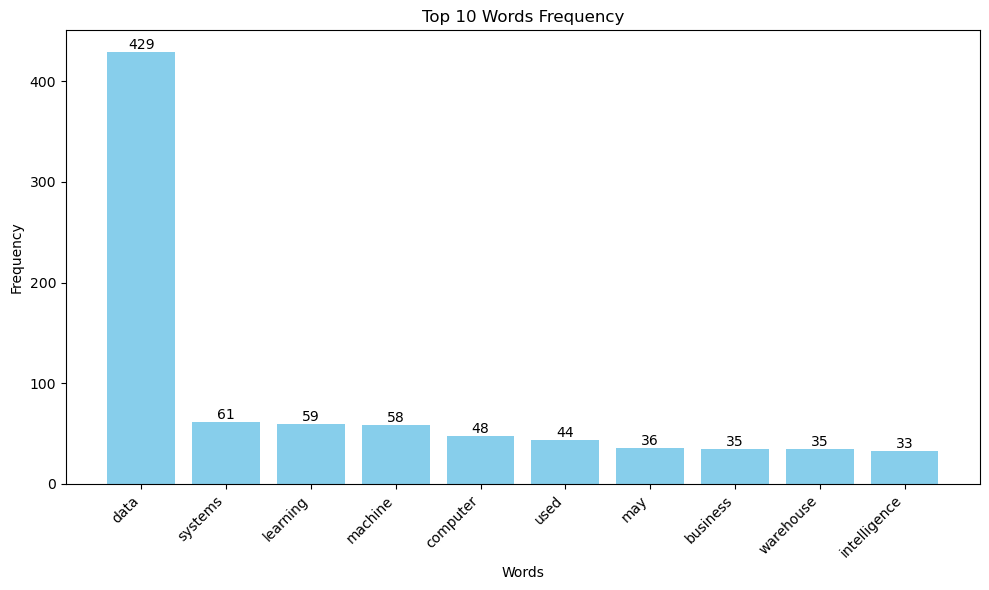

In [25]:
# Plot word frequency
plot_top_words(word_freq_no_stopword)